In [1]:
import neural_net
import pandas as pd 
import pickle 
import numpy as np
import scipy.optimize as op
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../../fashion-mnist/utils')

import mnist_reader

In [3]:
x_train, y_train = mnist_reader.load_mnist('../../fmnist', kind='train')
x_test, y_test = mnist_reader.load_mnist('../../fmnist', kind='t10k')

In [4]:
# para no estar recargando 
import numpy as np 
import copy 

def sigmoid(values):
    return 1 / (1 + np.exp(-values))

def forward_setup(nodos,X,Y,hidden_layers):
    nodos.insert(0,X.shape[1])
    nodos.append(len(Y[0]))
    nodes = [i + 1 for i in nodos]

    # red, mesh de thetas 
    thetas = []
    # por el momento le voy a poner mas 1 por la output layer 
    for i in range(hidden_layers + 1):
        temp_primero = np.expand_dims(np.asarray([(np.random.randint(1,10) / 1000) for i in range(nodes[i])],dtype='float64'),1)
        thetas.append(np.matrix(np.asarray(
            [temp_primero for i in range(nodos[i + 1])]
            )))
    return thetas

def forward_prop(X,thetas):
    inicial = X.T      
    trace = [inicial]
    for i in range(len(thetas)):
        interno = np.matmul(
            thetas[i],
            np.vstack(
                [np.expand_dims(np.ones(trace[i].shape[1]),0),
                trace[i]]
                )
        )
        trace.append(sigmoid(interno))
    return trace 

def backward_prop(thetas,shapes,X,Y):
    m,_ = X.shape
    # regresar a su normalidad 
    thetas = unflatten_zetas(thetas,shapes)
    delta = copy.deepcopy(thetas)
    for i in delta: i[:] = 0
    activation_trace = forward_prop(X,thetas)
    first_delta = activation_trace[-1] - Y.T
    deltas = [first_delta]
    # backward prop 
    for i in reversed(range(1,len(thetas))):
        first_delta = np.multiply(
            np.matmul(thetas[i].T[1:,:],first_delta),
            np.multiply(activation_trace[i],(1-activation_trace[i]))
            )
        deltas.append(first_delta)
    deltas.append(None)

    deltas = list(reversed(deltas))
    for i in range(len(delta)):
        temp_shape = activation_trace[i].shape
        multi_res = np.matmul(
            deltas[i + 1],
            np.vstack([np.ones((1,temp_shape[1])),activation_trace[i]]).T
            )
        delta[i] += multi_res / m
    return flatten_zetas(delta)[0]
    
def flatten_zetas(thetas):
    flat_zetas = np.asarray([])
    shapes = []
    for i in thetas:
        shapes.append(i.shape)
        flat_zetas = np.concatenate((flat_zetas,np.ravel(i)))
    return (flat_zetas,shapes)

def unflatten_zetas(flat_thetas,shapes):
    res = []
    for i in shapes:
        cantidad = i[0] * i[1]  
        res.append(flat_thetas[:cantidad].reshape(i))
    return res 

def cost(thetas,shapes,X,Y):
    thetas = unflatten_zetas(thetas,shapes)
    h = forward_prop(X,thetas)[-1]
    calculate = (Y * np.log(h).T) + ((1 - Y) * np.log(1 - h).T)
    print(np.sum(calculate) / (- X.shape[0]))
    return np.sum(calculate) / (- X.shape[0])

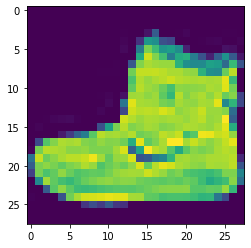

9


In [5]:
# un poco de transformaciones iniciales 
verificacion = plt.imshow(x_train[0].reshape(28,28))
plt.show()
print(y_train[0])
x_train_ingreso = x_train / 1000
x_test_ingreso = x_test / 1000
categorias = 10
y_train_ingreso = (np.expand_dims(y_train,1) == np.arange(categorias)).astype(int)
y_test_ingreso = (np.expand_dims(y_test,1) == np.arange(categorias)).astype(int)

In [6]:
architecture = [800]
thetas = forward_setup(architecture,x_train_ingreso, y_train_ingreso, len(architecture))
flat_thetas = flatten_zetas(thetas)

In [ ]:
start = time.time()

res = op.minimize(
    fun=cost,
    x0=flat_thetas[0],
    args=(flat_thetas[1],x_train_ingreso,y_train_ingreso),
    method='L-BFGS-B',
    jac=backward_prop,
    options={
        'disp':True,
        'maxiter':1300
    }
)

end = time.time()

20.92206789267457
20.841028823281363
20.518707683453563
19.25936731560811
14.735314900701068
7.401113301245769
12.545481539980429
14.259901043020225
14.634620792502005
14.714035881873357
14.73081972976276
14.73436536577644
14.7351143290864
14.735272533800572
14.735305951512913
14.735313010358439
14.735314501402822
14.73531481635705
14.73531488288503
14.735314896937775
14.735314899906141
14.73531490053315
14.735314900665598
14.735314900693577
14.735314900699477
12.936968574671528
7.5906425767739805
5.7537722008767505
7.096751654505773
7.482130106249781
7.567551194458766
7.585758357479987
7.589610765204665
7.590424659206238
7.590596555336914
7.590632857740928
7.590640524265898
7.590642143316533
7.59064248523459
7.590642557442306
7.590642572691437
7.5906425759118115
7.590642576591906
7.590642576735534
7.590642576765859
7.590642576772267
7.590642576773621
7.215847224019374
5.931559371164798
6.8899304514129005
6.235062762744849
6.737571436349814
6.857049136643522
5.409322385354243
6.3980248

In [ ]:
res

In [ ]:
with open('model.txt', 'wb') as f:
    pickle.dump(res, f)

In [ ]:
new_thetas = unflatten_zetas(res.x,flat_thetas[1])
respuestas = forward_prop(x_test_ingreso,new_thetas)

In [ ]:
number = 3
prueba = respuestas[-1][:][:,number]
print(np.argmax(prueba))
test = plt.imshow(x_test_ingreso[number].reshape(28,28))
plt.show()

In [ ]:
respuestas[-1].T[0]

In [ ]:
y_pred = np.asarray([np.argmax(i) for i in respuestas[-1].T])

In [ ]:
from sklearn import metrics 

metrics.accuracy_score(y_test,y_pred)